In [ ]:
#ANN multiclass-classification with Keras

In [11]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Load dataset
from sklearn.datasets import load_wine
data = load_wine()

In [9]:
#Display target names 
list(data.target_names)

['class_0','class_1','class_2']

['class_0', 'class_1', 'class_2']

In [10]:
#Store features and target
features=data.data
target=data.target

In [12]:
#Create X and Y
X=pd.DataFrame(features)
y=target

In [13]:
#Split the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [14]:
#Standardize the features
scaler =StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
#Shape of the data
X_train.shape

(133, 13)

In [16]:
#Define ANN
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(13,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [17]:
#Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [18]:
#Fit the model
history = model.fit(X_train,y_train,
                    batch_size=32,
                    epochs=300,
                    validation_split=0.2)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - acc: 0.3472 - loss: 1.1965 - val_acc: 0.4444 - val_loss: 0.9912
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.4961 - loss: 1.0093 - val_acc: 0.5926 - val_loss: 0.8419
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.6096 - loss: 0.8672 - val_acc: 0.7037 - val_loss: 0.7225
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.6558 - loss: 0.7473 - val_acc: 0.7037 - val_loss: 0.6287
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.7145 - loss: 0.6623 - val_acc: 0.8148 - val_loss: 0.5534
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.8214 - loss: 0.5971 - val_acc: 0.8519 - val_loss: 0.4929
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.8749 - loss: 0.5169 - val_acc: 0.8889 - val_loss: 0.4425
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.9188 - loss: 0.4830 - val_acc: 0.8889 - val_loss: 0.4021
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.9403 - loss: 

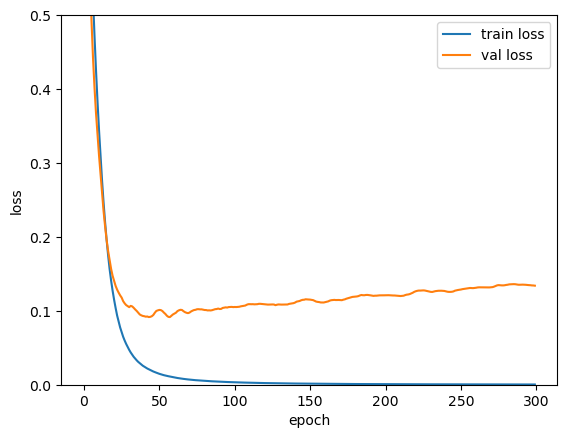

In [19]:
#Plot the learning history
plt.plot(history.history['loss'],
          label='train loss')
plt.plot(history.history['val_loss'],
          label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.ylim([0,0.5])
plt.show()

In [21]:
#Model evaluation
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train loss: {train_loss:.3f}")
print(f"Test loss : {test_loss:.3f}")
print(f"Train acc : {train_acc:.3f}")
print(f"Test acc  : {test_acc:.3f}")

Train loss: 0.027
Test loss : 0.021
Train acc : 0.992
Test acc  : 0.978


In [22]:
#Make prediction
y_pred = model.predict(X_test)
print(np.round(y_pred,3))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
[[0.    0.    1.   ]
 [0.    0.005 0.995]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.994 0.006 0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.001 0.    0.999]
 [0.    0.999 0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.001 0.999 0.   ]
 [0.001 0.999 0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.996 0.003 0.   ]
 [0.963 0.036 0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.997 0.002 0.002]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.002 0.412 0.586]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.996 0.003 0.001]
 [0.    1.    0.   ]]
